In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
from moara_for_qiskit import MoaraSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend

In [3]:
max_depth = 15
shot_count = 1

def getQiskitSimulator():
    return Aer.get_backend('qasm_simulator')

def entanglerCX(circuit,n):
    for i in range(n-1):
        circuit.cx(i,i+1)

def RxRy(citrcuit,n):
    for i in range(n):
        citrcuit.rx(np.pi/3,i)
        citrcuit.ry(np.pi/5,i)

def XY(citrcuit,n):
    for i in range(n):
        citrcuit.x(i)
        citrcuit.y(i)

In [4]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range(j):
        entanglerCX(qc,i)
        RxRy(qc,i)
        #XY(qc,i)
    qc.measure(range(i), range(i))
    return qc

In [5]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(10,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_qc)
            a.get('0'*i,0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [6]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌─────────┐┌─────────┐                ┌─────────┐┌─────────┐»
q_0: ──■──┤ RX(π/3) ├┤ RY(π/5) ├─────────────■──┤ RX(π/3) ├┤ RY(π/5) ├»
     ┌─┴─┐└─────────┘├─────────┤┌─────────┐┌─┴─┐└─────────┘├─────────┤»
q_1: ┤ X ├─────■─────┤ RX(π/3) ├┤ RY(π/5) ├┤ X ├─────■─────┤ RX(π/3) ├»
     └───┘   ┌─┴─┐   ├─────────┤├─────────┤└───┘   ┌─┴─┐   ├─────────┤»
q_2: ────────┤ X ├───┤ RX(π/3) ├┤ RY(π/5) ├────────┤ X ├───┤ RX(π/3) ├»
             └───┘   └─────────┘└─────────┘        └───┘   └─────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«                     ┌─────────┐┌─────────┐           ┌─┐      
«q_0: ─────────────■──┤ RX(π/3) ├┤ RY(π/5) ├───────────┤M├──────
«     ┌─────────┐┌─┴─┐└─────────┘├─────────┤┌─────────┐└╥┘┌─┐   
«q_1: ┤ RY(π/5) ├┤ X ├─────■─────┤ RX(π/3) ├┤ RY(π/5) ├─╫─┤M├───
«     ├─────────┤└───┘   ┌─┴─┐   ├─────────┤├─────────┤ ║ └╥┘┌─┐
«q_2: ┤ RY(π/5) ├────────┤ X ├───┤ RX(π/3) ├┤ RY(π/5) ├─╫──╫─┤M├
«     └─────────┘        └───┘   └─────────┘└─────────┘ ║  ║ └╥┘
«c: 3/══════════════════════════════════════════════════╩══╩══╩═
«                                                       0  1  2

In [7]:
simulator = getQiskitSimulator()
result = execute(qc, simulator, shots=1024)
print(result.result().get_counts())

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
result2 = execute(qc, simulator2, shots=1024)
print(result2)

{'000': 40, '001': 201, '010': 9, '011': 120, '100': 353, '101': 49, '110': 138, '111': 114}
{'000': 1024}


In [8]:
# def exec_func(sim, circ):
#     return execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)

# simulator=getQiskitSimulator()
# depth=bench(simulator,max_depth, exec_func)
# print(depth)

In [9]:
# simulator_name='Qiskit Aer-qasm_simulator'

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = [i for i in range(10,max_depth)]
# ax.bar(langs,depth)
# ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
# ax.set_xlabel('nr. Qubits')
# ax.set_ylabel('Depth (RxRy_Cx)')
# plt.show()

In [10]:
def exec_func2(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count)

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
depth2=bench(simulator2, max_depth, exec_func2)
print(depth2)

[100, 100, 100, 100, 100]


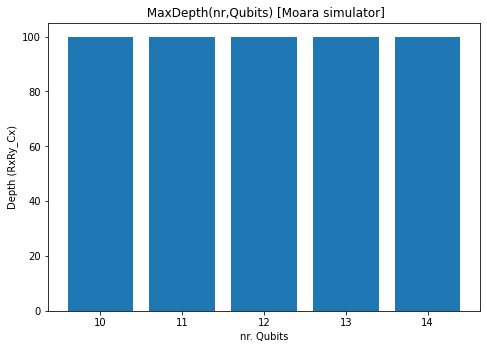

In [11]:
simulator_name2='Moara simulator'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(10,max_depth)]
ax.bar(langs,depth2)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name2+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [14]:
i=20
j=80
circ=test(i,j)
from moara_for_qiskit import MoaraSimulator
sim = MoaraSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

0.2993438243865967


In [13]:
i=20
j=80
circ=test(i,j)

sim = getQiskitSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

3.413939952850342
